In [187]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [215]:
df1k = pd.read_csv("1K_Performance.csv")
df3k = pd.read_csv("3K_Performance.csv")
df5k = pd.read_csv("5K_Performance.csv")
df10k = pd.read_csv("10K_Performance.csv")

df1k = df1k[df1k['F1 Score'] != 0]
df3k = df3k[df3k['F1 Score'] != 0]
df5k = df5k[df5k['F1 Score'] != 0]
df10k = df10k[df10k['F1 Score'] != 0]

df1k['Binned'] = "1KB-2.5KB"
df3k['Binned'] = "2.5KB-5KB"
df5k['Binned'] = "5KB-10KB"
df10k['Binned'] = "10KB+"

df_combined = pd.concat([df1k,df3k,df5k,df10k])

df = pd.read_csv("Overall_Performance.csv")
df_prophage = pd.read_csv("Prophage_Performance.csv")
df_prophage = df_prophage[df_prophage['Recall'] != 0]

In [216]:
Groups_df = [v for k, v in df.groupby('Simulation', as_index=False)]
for i in range(0, len(Groups_df)):
    Groups_df[i]["F1_Rank"] = Groups_df[i]["F1 Score"].rank(ascending=False)
    Groups_df[i]["Recall_Rank"] = Groups_df[i]["Recall"].rank(ascending=False)
    Groups_df[i]["Precision_Rank"] = Groups_df[i]["Precision"].rank(ascending=False)
ranked = pd.concat(Groups_df)
ranked.groupby("Tool").mean()

,Precision,Recall,F1 Score,F1_Rank,Recall_Rank,Precision_Rank
Tool,,,,,,
DeepVirFinder,0.391562,0.496258,0.432269,5.038462,7.903846,5.384615
Earth Virome,0.022829,0.872138,0.044270,9.733333,1.783333,9.733333
Kraken2,0.961676,0.466544,0.609078,2.933333,7.800000,1.066667
Metaphinder,0.082139,0.842030,0.137511,8.733333,2.833333,8.866667
Vibrant,0.569991,0.597388,0.577279,3.517241,7.258621,4.103448
VirBrant,0.316233,0.754926,0.412827,5.400000,3.600000,6.000000
VirBrant_Proteins,0.141617,0.716895,0.212857,7.466667,4.633333,7.700000
VirFinder,0.716740,0.450335,0.547625,3.933333,9.316667,2.300000
VirSorter,0.636294,0.658257,0.638935,2.100000,6.400000,3.100000


In [217]:
from scipy import stats
import numpy as np
print(stats.kruskal(df1k['F1 Score'], df3k['F1 Score'], df5k['F1 Score'], df10k['F1 Score']))
print(stats.kruskal(df1k['Recall'], df3k['Recall'], df5k['Recall'], df10k['Recall']))
print(stats.kruskal(df1k['Precision'], df3k['Precision'], df5k['Precision'], df10k['Precision']))

KruskalResult(statistic=282.52462609376454, pvalue=6.019414791332231e-61)
KruskalResult(statistic=232.34642624387098, pvalue=4.300113354343303e-50)
KruskalResult(statistic=204.28479239898076, pvalue=5.00368054787216e-44)


In [218]:
df.head()

,Simulation,Precision,Recall,F1 Score,Tool
0,Gut_Medium_Halfnormal,0.019132,0.861272,0.037432,Earth Virome
1,Gut_Full_Lognormal,0.021619,0.818284,0.042124,Earth Virome
2,Gut_Medium_Lognormal,0.008449,0.796460,0.016721,Earth Virome
3,Soil_Medium_Exponential,0.024799,0.796380,0.048101,Earth Virome
4,Soil_Medium_Uniform,0.021466,0.972222,0.042004,Earth Virome


In [219]:
df['Read'] = [x.split("_")[2] for x in df['Simulation']]
df_u = df[df['Read']=="Uniform"]
df_e = df[df['Read']=="Exponential"]
df_l = df[df['Read']=="Lognormal"]
df_z = df[df['Read']=="Zero"]
df_h = df[df['Read']=="Halfnormal"]


from scipy import stats
import numpy as np
print(stats.kruskal(df_u['F1 Score'], df_z['F1 Score'], df_h['F1 Score'], df_e['F1 Score'], df_l['F1 Score']))
print(stats.kruskal(df_u['Recall'], df_z['Recall'], df_h['Recall'], df_e['Recall'], df_l['Recall']))
print(stats.kruskal(df_l['Precision'], df_u['Precision'], df_e['Precision'], df_h['Precision'], df_z['Precision']))

KruskalResult(statistic=4.016044013974991, pvalue=0.40383888309941346)
KruskalResult(statistic=0.7432588138818529, pvalue=0.9458890258075235)
KruskalResult(statistic=2.8021885160521363, pvalue=0.5914549955574187)


In [220]:
p = pd.DataFrame()
p['1KB-2.5KB'] = df1k['Precision']
p['2.5KB-5KB'] = df3k['Precision']
p['5KB-10KB'] = df5k['Precision']
p['10KB+'] = df10k['Precision']

r = pd.DataFrame()
r['1KB-2.5KB'] = df1k['Recall']
r['2.5KB-5KB'] = df3k['Recall']
r['5KB-10KB'] = df5k['Recall']
r['10KB+'] = df10k['Recall']

f1 = pd.DataFrame()
f1['1KB-2.5KB'] = df1k['F1 Score']
f1['2.5KB-5KB'] = df3k['F1 Score']
f1['5KB-10KB'] = df5k['F1 Score']
f1['10KB+'] = df10k['F1 Score']

In [221]:
df_combined.head()

,Simulation,Precision,Recall,F1 Score,Tool,Binned
0,Gut_Medium_Halfnormal,0.031915,0.700000,0.061047,Earth Virome,1KB-2.5KB
1,Gut_Full_Lognormal,0.021772,0.630058,0.042089,Earth Virome,1KB-2.5KB
2,Gut_Medium_Lognormal,0.003497,0.333333,0.006920,Earth Virome,1KB-2.5KB
3,Soil_Medium_Exponential,0.033431,0.575758,0.063193,Earth Virome,1KB-2.5KB
4,Soil_Medium_Uniform,0.047619,0.666667,0.088889,Earth Virome,1KB-2.5KB


In [222]:
from scipy import stats
import numpy as np
import seaborn as sns
print(stats.kruskal(df1k['F1 Score'], df3k['F1 Score'], df5k['F1 Score'], df10k['F1 Score']))
print(stats.kruskal(df1k['Recall'], df3k['Recall'], df5k['Recall'], df10k['Recall']))
print(stats.kruskal(df1k['Precision'], df3k['Precision'], df5k['Precision'], df10k['Precision']))

KruskalResult(statistic=282.52462609376454, pvalue=6.019414791332231e-61)
KruskalResult(statistic=232.34642624387098, pvalue=4.300113354343303e-50)
KruskalResult(statistic=204.28479239898076, pvalue=5.00368054787216e-44)


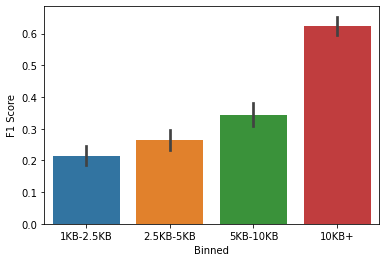

In [223]:
ax = sns.barplot(x="Binned", y="F1 Score", data=df_combined)

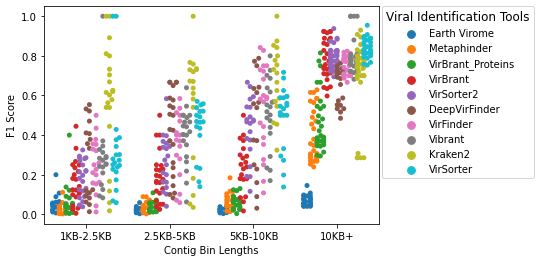

In [224]:
import seaborn as sns
Tools = ['Vibrant', "VirSorter", "VirSorter2", "Kraken2", "VirFinder", "DeepVirFinder", "VirBrant Features", "VirBrant", "VirBrant Proteins", "Metaphinder", "Earth Virome"]

x_pos = np.arange(len(Tools))
ax = sns.swarmplot(x="Binned", y="F1 Score", hue="Tool", dodge=True, data=df_combined)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="Viral Identification Tools", title_fontsize="large")
plt.xlabel("Contig Bin Lengths")
plt.savefig("F1_contig_length.jpg", dpi=350, bbox_inches='tight')

In [225]:
df_combined2 = df_combined[df_combined["Binned"]=="10KB+"]
df_combined2.groupby("Tool").median()

,Precision,Recall,F1 Score
Tool,,,
DeepVirFinder,0.750000,0.615385,0.703412
Earth Virome,0.030056,1.000000,0.058354
Kraken2,1.000000,0.600785,0.745645
Metaphinder,0.219655,0.923077,0.352028
Vibrant,0.852814,0.714286,0.781186
VirBrant,0.716095,0.861174,0.765357
VirBrant_Proteins,0.264330,0.869293,0.393693
VirFinder,0.993842,0.640825,0.773390
VirSorter,0.816393,0.848178,0.827619


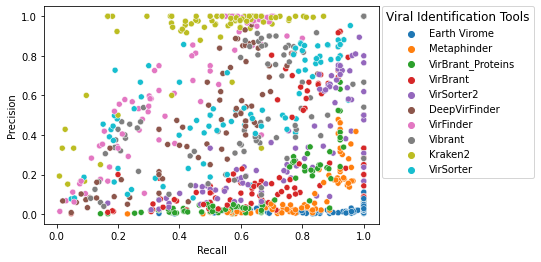

In [226]:
ax = sns.scatterplot(x="Recall", y="Precision", hue="Tool", data=df_combined)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="Viral Identification Tools", title_fontsize="large")
#plt.xlabel("Contig Bin Length")

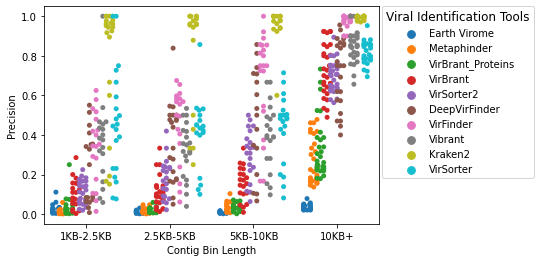

In [227]:
x_pos = np.arange(len(Tools))
ax = sns.swarmplot(x="Binned", y="Precision", hue="Tool", dodge=True, data=df_combined)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="Viral Identification Tools", title_fontsize="large")
plt.xlabel("Contig Bin Length")
plt.savefig("Precision_contig_length.jpg", dpi=350, bbox_inches='tight')

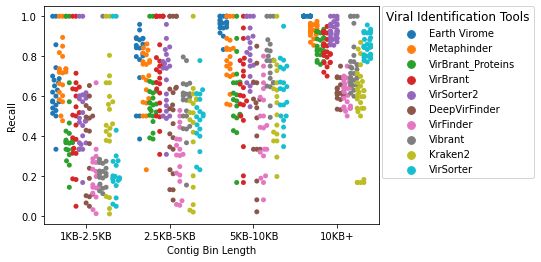

In [228]:
x_pos = np.arange(len(Tools))
ax = sns.swarmplot(x="Binned", y="Recall", hue="Tool", dodge=True, data=df_combined)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="Viral Identification Tools", title_fontsize="large")
plt.xlabel("Contig Bin Length")
plt.savefig("Recall_contig_length.jpg", dpi=350, bbox_inches='tight')

In [229]:
df['Taxonomy'] = [x.split("_")[1] for x in df['Simulation']]
df_low = df[df['Taxonomy']=="Low"]
df_medium = df[df['Taxonomy']=="Medium"]
df_full = df[df['Taxonomy']=="Full"]


from scipy import stats
import numpy as np
print(stats.kruskal(df_low['F1 Score'], df_medium['F1 Score'], df_full['F1 Score']))
print(stats.kruskal(df_low['Recall'], df_medium['Recall'], df_full['Recall']))
print(stats.kruskal(df_low['Precision'], df_medium['Precision'], df_full['Precision']))

KruskalResult(statistic=47.64922588462627, pvalue=4.4988557228131836e-11)
KruskalResult(statistic=81.50290163840673, pvalue=2.0038710897659015e-18)
KruskalResult(statistic=27.541658092005388, pvalue=1.0456947655935748e-06)


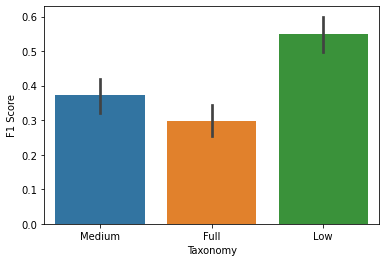

In [203]:
ax = sns.barplot(x="Taxonomy", y="F1 Score", data=df)


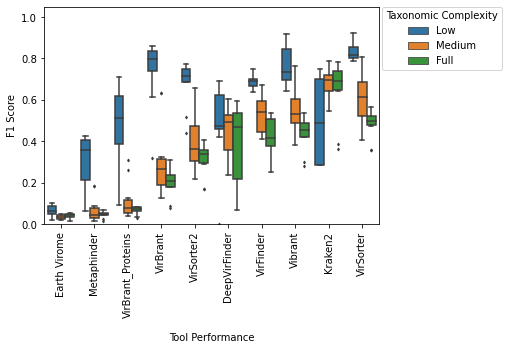

In [204]:
x_pos = np.arange(len(Tools))
ax = sns.boxplot(x="Tool", y="F1 Score", hue="Taxonomy",hue_order=["Low","Medium","Full"],dodge=True, data=df, fliersize=2)
plt.legend(title="Taxonomic Complexity",bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("\nTool Performance")
plt.ylim(0,1.05)
plt.savefig("F1_Overall.jpg", dpi=350, bbox_inches='tight')

In [214]:
df10k.groupby(["Tool"]).median()

,Precision,Recall,F1 Score
Tool,,,
DeepVirFinder,0.750000,0.615385,0.703412
Earth Virome,0.030056,1.000000,0.058354
Kraken2,1.000000,0.600785,0.745645
Metaphinder,0.219655,0.923077,0.352028
Vibrant,0.852814,0.714286,0.781186
VirBrant,0.716095,0.861174,0.765357
VirBrant_Proteins,0.264330,0.869293,0.393693
VirFinder,0.993842,0.640825,0.773390
VirSorter,0.816393,0.848178,0.827619


In [145]:
#Soil and Gut

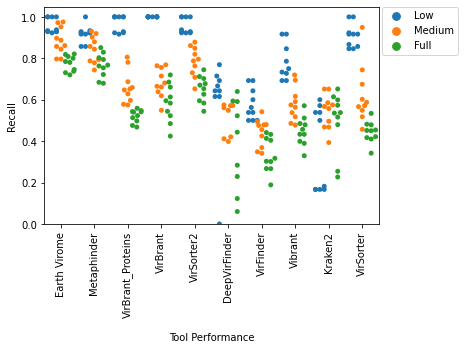

In [146]:
df['Taxonomy'] = [x.split("_")[1] for x in df['Simulation']]
x_pos = np.arange(len(Tools))
ax = sns.swarmplot(x="Tool", y="Recall", hue="Taxonomy",hue_order=["Low","Medium","Full"],dodge=True, data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("\nTool Performance")
plt.ylim(0,1.05)
plt.savefig("Recall_Overall.jpg", dpi=350, bbox_inches='tight')

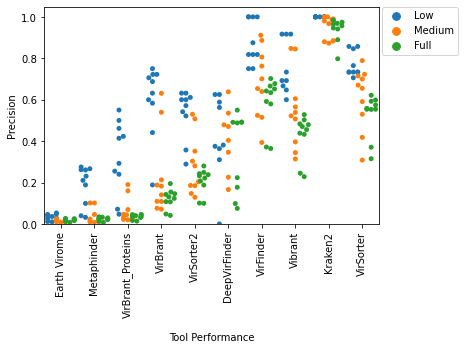

In [147]:
df['Taxonomy'] = [x.split("_")[1] for x in df['Simulation']]
x_pos = np.arange(len(Tools))
ax = sns.swarmplot(x="Tool", y="Precision", hue="Taxonomy",hue_order=["Low","Medium","Full"],dodge=True, data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("\nTool Performance")
plt.ylim(0,1.05)
plt.savefig("Precision_Overall.jpg", dpi=350, bbox_inches='tight')

In [148]:
df_prophage.head()

,Simulation,Precision,Recall,F1 Score,Tool
0,Gut_Medium_Halfnormal,0.005079,0.696429,0.010085,Earth Virome
1,Gut_Full_Lognormal,0.006480,0.740484,0.012847,Earth Virome
2,Gut_Medium_Lognormal,0.002832,0.566038,0.005636,Earth Virome
3,Soil_Medium_Exponential,0.005746,0.784314,0.011409,Earth Virome
4,Soil_Medium_Uniform,0.003746,0.923077,0.007463,Earth Virome


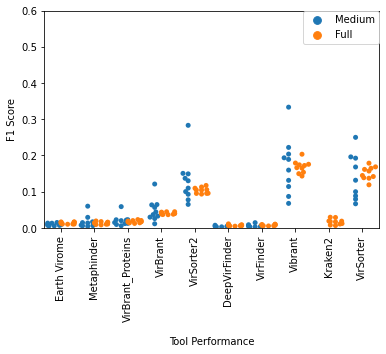

In [149]:
df_prophage['Taxonomy'] = [x.split("_")[1] for x in df_prophage['Simulation']]
df_prophage = df_prophage[df_prophage['Taxonomy']!="Low"]
ax = sns.swarmplot(x="Tool", y="F1 Score", hue="Taxonomy",hue_order=["Medium","Full"],dodge=True, data=df_prophage)
plt.legend(bbox_to_anchor=(1.00, 1),borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("\nTool Performance")
plt.ylim(0,0.6)
plt.savefig("Prophage_F1.jpg", dpi=350, bbox_inches='tight')


In [150]:
df_prophage.head()

,Simulation,Precision,Recall,F1 Score,Tool,Taxonomy
0,Gut_Medium_Halfnormal,0.005079,0.696429,0.010085,Earth Virome,Medium
1,Gut_Full_Lognormal,0.006480,0.740484,0.012847,Earth Virome,Full
2,Gut_Medium_Lognormal,0.002832,0.566038,0.005636,Earth Virome,Medium
3,Soil_Medium_Exponential,0.005746,0.784314,0.011409,Earth Virome,Medium
4,Soil_Medium_Uniform,0.003746,0.923077,0.007463,Earth Virome,Medium


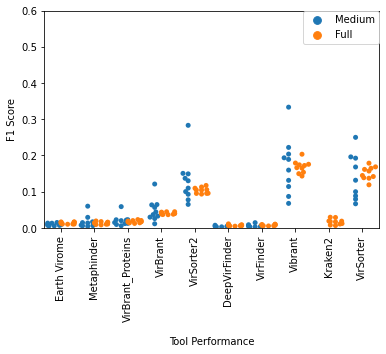

In [151]:
df_prophage['Taxonomy'] = [x.split("_")[1] for x in df_prophage['Simulation']]
df_prophage = df_prophage[df_prophage['Taxonomy']!="Low"]
ax = sns.swarmplot(x="Tool", y="F1 Score", hue="Taxonomy",hue_order=["Medium","Full"],dodge=True, data=df_prophage)
plt.legend(bbox_to_anchor=(1.00, 1),borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("\nTool Performance")
plt.ylim(0,0.6)
plt.savefig("Prophage_F1.jpg", dpi=350, bbox_inches='tight')


In [152]:
df_prophage.columns = ['Simulation', "Prophage_Precision", "Prophage_Recall", "Prophage_F1", "Tools", "Taxonomy"]
df['ID'] = df['Simulation'] + "_" + df['Tool']
df_prophage['ID'] = df_prophage['Simulation'] + "_" + df_prophage['Tools']
df_prophage2 = df_prophage.merge(df, left_on="ID", right_on="ID")

In [153]:
df_prophage2["Normalized Recall"] = df_prophage2['Prophage_Recall']/df_prophage2['Recall']
df_prophage2["Normalized F1"] = df_prophage2['Prophage_Recall']/df_prophage2['Prophage_F1']


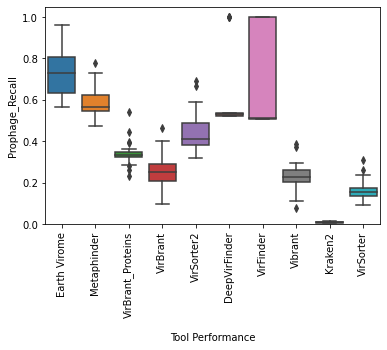

In [154]:
ax = sns.boxplot(x="Tool", y="Prophage_Recall",
                 #hue="Taxonomy",hue_order=["Medium","Full"], dodge=True, 
                 data=df_prophage2)
#plt.legend(bbox_to_anchor=(1.00, 1),borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("\nTool Performance")
plt.ylim(0,1.05)
plt.savefig("Prophage_Recall.jpg", dpi=350, bbox_inches='tight')

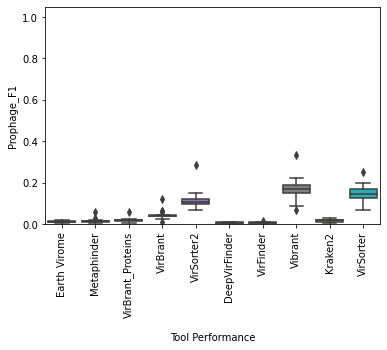

In [155]:
ax = sns.boxplot(x="Tool", y="Prophage_F1",
                 #hue="Taxonomy",hue_order=["Medium","Full"], dodge=True, 
                 data=df_prophage2)
#plt.legend(bbox_to_anchor=(1.00, 1),borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("\nTool Performance")
plt.ylim(0,1.05)
plt.savefig("Prophage_F1.jpg", dpi=350, bbox_inches='tight')

In [156]:
df_prophage.groupby("Tools").mean()

,Prophage_Precision,Prophage_Recall,Prophage_F1
Tools,,,
DeepVirFinder,0.003253,0.637496,0.006467
Earth Virome,0.005879,0.728257,0.011650
Kraken2,0.171959,0.008955,0.016863
Metaphinder,0.007756,0.587809,0.015212
Vibrant,0.145777,0.230819,0.169246
VirBrant,0.026934,0.251866,0.044629
VirBrant_Proteins,0.009781,0.341682,0.018820
VirFinder,0.003648,0.705367,0.007248
VirSorter,0.144143,0.163533,0.146591


In [157]:
Groups_df = [v for k, v in df_prophage.groupby('Simulation', as_index=False)]
for i in range(0, len(Groups_df)):
    Groups_df[i]["F1_Rank"] = Groups_df[i]["Prophage_F1"].rank(ascending=False)
    Groups_df[i]["Recall_Rank"] = Groups_df[i]["Prophage_Recall"].rank(ascending=False)
    Groups_df[i]["Precision_Rank"] = Groups_df[i]["Prophage_Precision"].rank(ascending=False)
ranked = pd.concat(Groups_df)
ranked.groupby("Tools").mean()

,Prophage_Precision,Prophage_Recall,Prophage_F1,F1_Rank,Recall_Rank,Precision_Rank
Tools,,,,,,
DeepVirFinder,0.003253,0.637496,0.006467,8.794118,2.794118,9.029412
Earth Virome,0.005879,0.728257,0.011650,6.850000,1.600000,7.000000
Kraken2,0.171959,0.008955,0.016863,6.700000,9.900000,1.850000
Metaphinder,0.007756,0.587809,0.015212,6.650000,2.900000,6.850000
Vibrant,0.145777,0.230819,0.169246,1.150000,7.450000,1.950000
VirBrant,0.026934,0.251866,0.044629,3.950000,7.125000,4.450000
VirBrant_Proteins,0.009781,0.341682,0.018820,5.200000,6.050000,5.500000
VirFinder,0.003648,0.705367,0.007248,8.875000,2.725000,8.875000
VirSorter,0.144143,0.163533,0.146591,2.105263,8.763158,1.657895


In [233]:
df = pd.read_csv("Genera_Recall.csv")
contigs = pd.read_csv("Genera_Distribution_Viral.csv", sep="\t")
df.head()

,Unnamed: 0,Acinetobacter,Actinomyces,Arthrobacter,Bacillus,Bacteroides,Bifidobacterium,Bradyrhizobium,Brevibacterium,Burkholderia,...,Pseudomonas,Rhizobium,Rhodococcus,Rothia,Salmonella,Sphingomonas,Staphylococcus,Stenotrophomonas,Streptomyces,Xanthomonas
0,Soil_Low_Lognormal_VirSorter,0.0,0.000000,0.000000,0.600000,0.0,NaN,0.0,0.0,0.0,...,0.900000,0.0,0.0,NaN,0.000000,0.0,0.0,0.000000,1.000000,0.0
1,Gut_Low_Exponential_VirSorter,0.0,0.000000,1.000000,1.000000,0.0,NaN,0.0,0.0,0.0,...,1.000000,0.0,0.0,NaN,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,Gut_Medium_Uniform_VirSorter,0.0,0.000000,0.375000,1.000000,1.0,NaN,0.0,0.0,0.0,...,0.470588,0.0,0.0,NaN,0.937500,0.0,1.0,0.000000,0.533333,0.0
3,Soil_Low_Uniform_VirSorter,0.0,0.000000,0.000000,0.666667,0.0,NaN,0.0,0.0,0.0,...,1.000000,0.0,0.0,NaN,0.000000,0.0,0.0,0.000000,1.000000,0.0
4,Gut_Full_Exponential_VirSorter,0.0,0.105263,0.347826,0.542373,0.0,NaN,0.0,0.0,0.0,...,0.441176,0.0,0.0,NaN,0.627273,0.0,0.8,0.135593,0.315789,0.0


In [234]:
df['Taxonomy'] = [x.split("_")[0] for x in df['Unnamed: 0']]
df['Complexity'] = [x.split("_")[1] for x in df['Unnamed: 0']]
df['Tool'] = [x.split("_")[-1] for x in df['Unnamed: 0']]
df = df[df['Complexity']!="Low"]
df_gut = df[df['Taxonomy']=="Gut"]
df_soil = df[df['Taxonomy']=="Soil"]

df_soil.replace(0, np.nan, inplace=True) 
df_soil.dropna(how='all', axis=1, inplace=True)
df_soil.replace(np.nan, 0, inplace=True)

df_soil = df_soil.drop(["Taxonomy", "Complexity", "Unnamed: 0"], axis=1)
df_s = pd.melt(df_soil, id_vars="Tool")
df_s = df_s[df_s['value'] != 0]

df_gut.replace(0, np.nan, inplace=True) 
df_gut.dropna(how='all', axis=1, inplace=True)
df_gut.replace(np.nan, 0, inplace=True)

df_gut = df_gut.drop(["Taxonomy", "Complexity", "Unnamed: 0"], axis=1)
df_g = pd.melt(df_gut, id_vars="Tool")
df_g = df_g[df_g['value'] != 0]

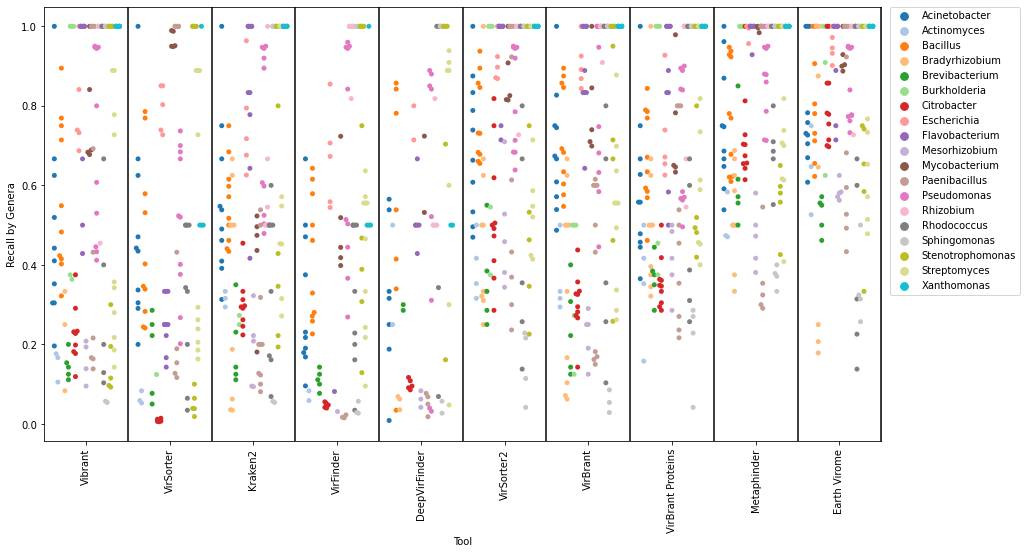

In [119]:
plt.figure(figsize=(15,8))
g = sns.swarmplot(data=df_s, x="Tool", y="value", hue="variable", dodge=True, palette="tab20")
#g = sns.boxplot(data=df_s, x="Tool", y="value", hue="variable", dodge=True, palette="tab20")

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Contig Length in Base Pairs (BPs)")

Tools = ['Vibrant', "VirSorter", "Kraken2", "VirFinder", "DeepVirFinder", "VirSorter2", "VirBrant", "VirBrant Proteins", "Metaphinder", "Earth Virome"]

g.set_xticklabels(Tools)
plt.xticks(rotation = 90)
plt.axvline(0.5, c='black')
plt.axvline(1.5, c='black')
plt.axvline(2.5, c='black')
plt.axvline(3.5, c='black')
plt.axvline(4.5, c='black')
plt.axvline(5.5, c='black')
plt.axvline(6.5, c='black')
plt.axvline(7.5, c='black')
plt.axvline(8.5, c='black')
plt.axvline(9.5, c='black')
plt.xlabel("Tool")
plt.ylabel("Recall by Genera")
plt.savefig("Recall_Genera_Soil.jpg", dpi=350, bbox_inches='tight')

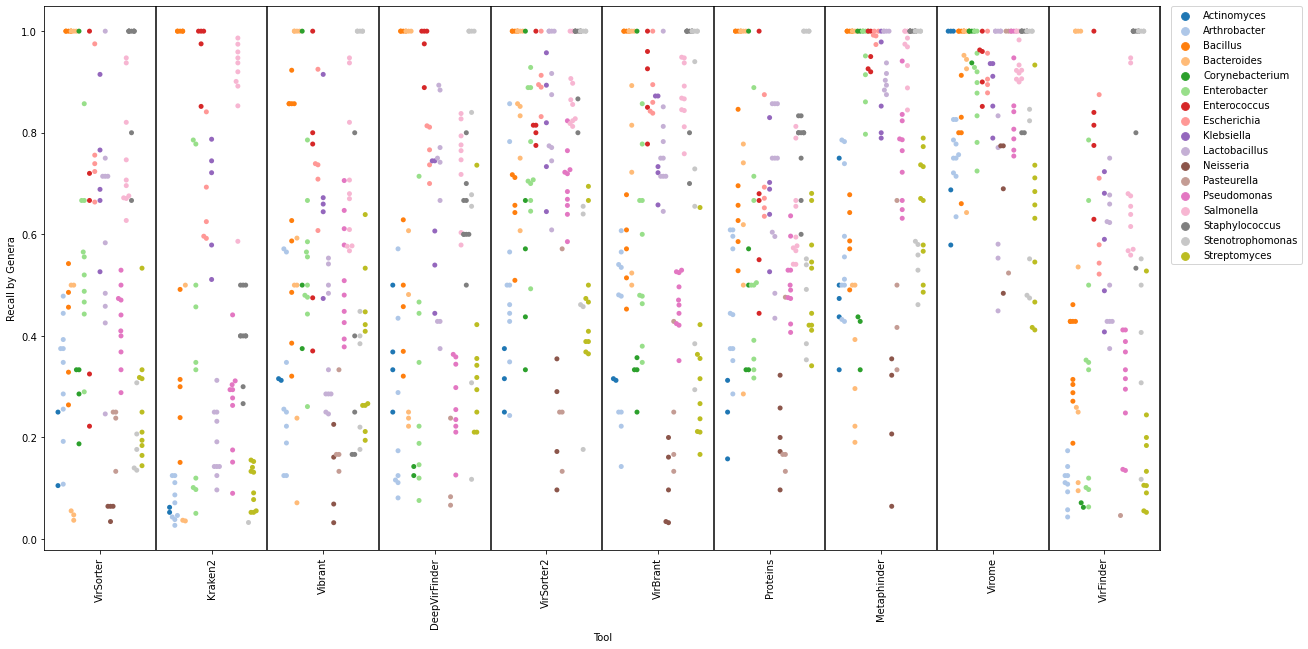

In [131]:
plt.figure(figsize=(20,10))
g = sns.swarmplot(data=df_g, x="Tool", y="value", hue="variable", dodge=True, palette="tab20")
#g = sns.boxplot(data=df_g, x="Tool", y="value", hue="variable", dodge=True, palette="tab20")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Contig Length in Base Pairs (BPs)")

#Tools = ['Vibrant', "VirSorter", "Kraken2", "VirFinder", "DeepVirFinder", "VirSorter2",  "VirBrant", "VirBrant Proteins", "Metaphinder", "Earth Virome"]

#g.set_xticklabels(Tools)
plt.xticks(rotation = 90)
plt.axvline(0.5, c='black')
plt.axvline(1.5, c='black')
plt.axvline(2.5, c='black')
plt.axvline(3.5, c='black')
plt.axvline(4.5, c='black')
plt.axvline(5.5, c='black') 
plt.axvline(6.5, c='black')
plt.axvline(7.5, c='black')
plt.axvline(8.5, c='black')
plt.axvline(9.5, c='black')

plt.xlabel("Tool")
plt.ylabel("Recall by Genera")
plt.savefig("Recall_Genera_Gut.jpg", dpi=350, bbox_inches='tight')

In [235]:
df2 = df.drop(["Taxonomy", "Complexity", "Unnamed: 0"], axis=1)
df_m = pd.melt(df2, id_vars="Tool")
df_m = df_m[df_m['value'] > 0]
#df_m = df_m[df_m['value'] < 0.1]
#df_m = df_m[df_m['variable'] =="Enterococcus"]
df_m = df_m.dropna()

In [236]:
len(df_m.groupby("variable").mean())

30

In [237]:
df_m.groupby("Tool").mean()

,value
Tool,
DeepVirFinder,0.512537
Kraken2,0.434708
Metaphinder,0.785962
Proteins,0.636863
Vibrant,0.538039
VirBrant,0.645285
VirFinder,0.490745
VirSorter,0.573180
VirSorter2,0.724078


In [251]:
df_vibrant = df_m[df_m['Tool']=="Vibrant"]
df_virbrant = df_m[df_m['Tool']=="VirBrant"]
df_vs = df_m[df_m['Tool']=="VirSorter"]
df_vs2 = df_m[df_m['Tool']=="VirSorter2"]
df_k = df_m[df_m['Tool']=="Kraken2"]
df_mp = df_m[df_m['Tool']=="Metaphinder"]
df_v = df_m[df_m['Tool']=="Virome"]
df_vf = df_m[df_m['Tool']=="VirFinder"]
df_dvf = df_m[df_m['Tool']=="DeepVirFinder"]

In [252]:
k = df_m.groupby("variable").mean().reset_index()
k = k.sort_values(by="value", ascending=False)
my_list = list(k['variable'])

In [258]:
df_list = [df_v, df_mp, df_virbrant, df_dvf, df_vs2, df_vf, df_k, df_vs, df_vibrant]
df_list[1].iloc[1]["Tool"]

'Metaphinder'

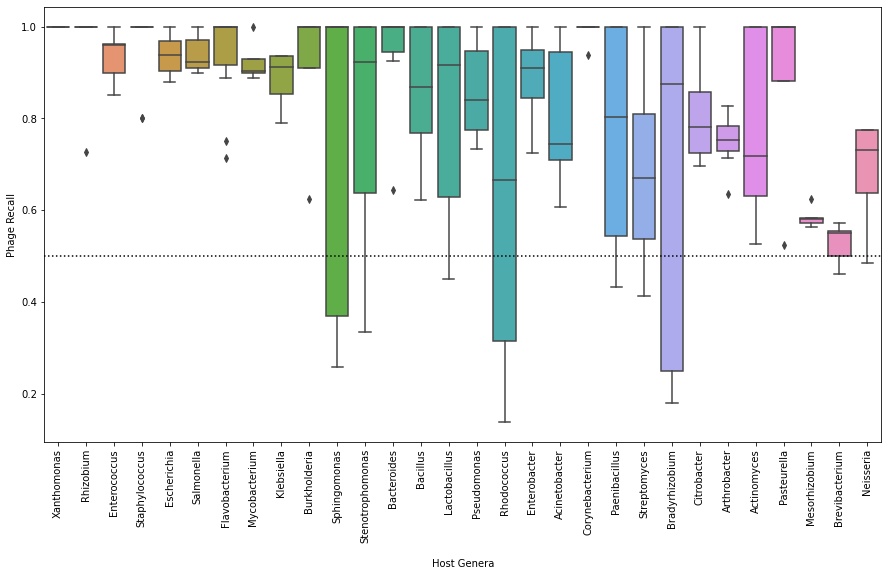

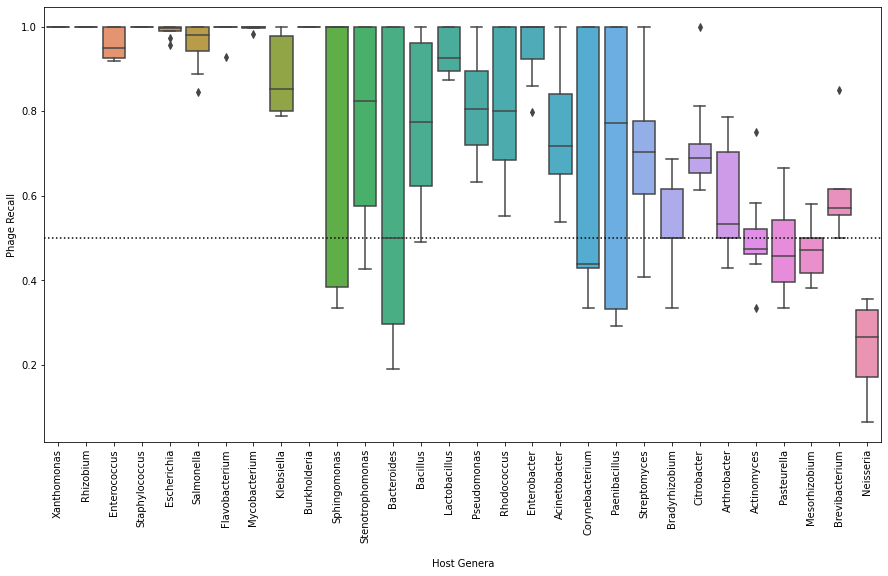

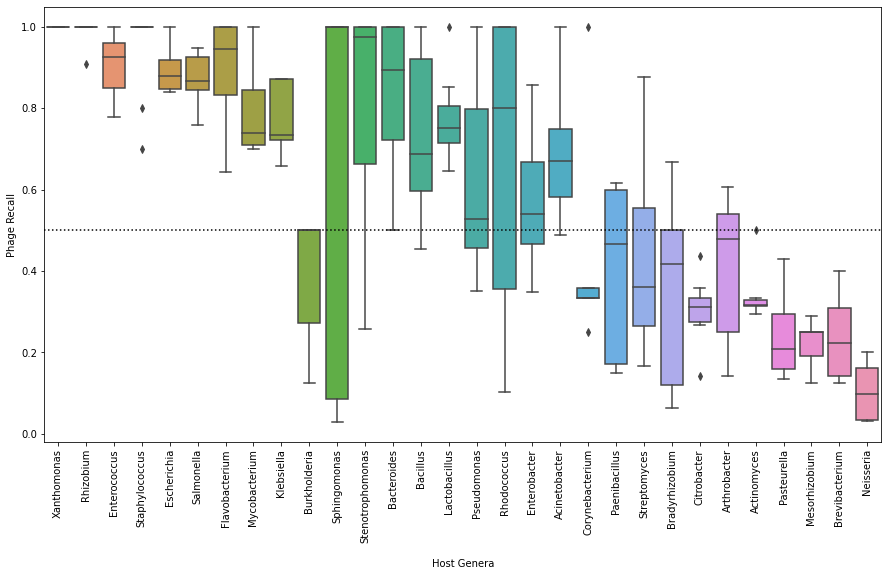

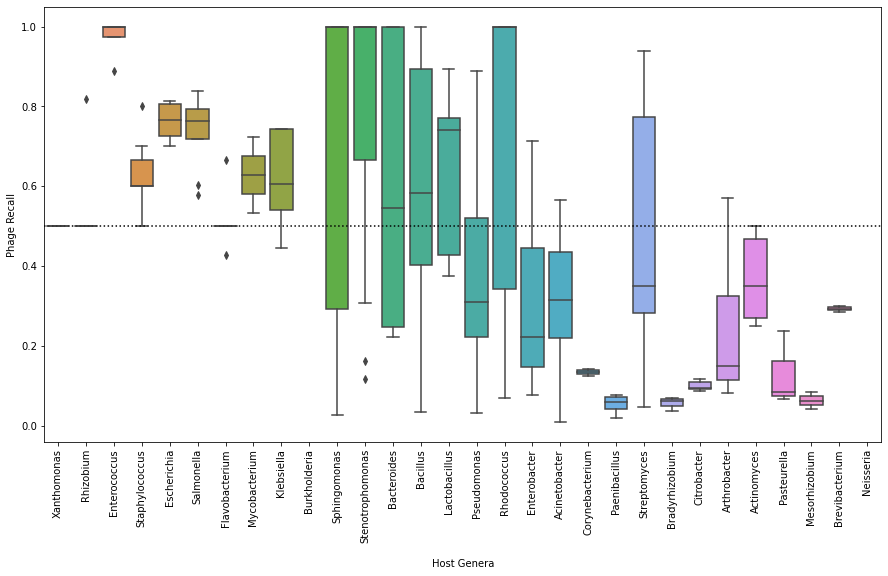

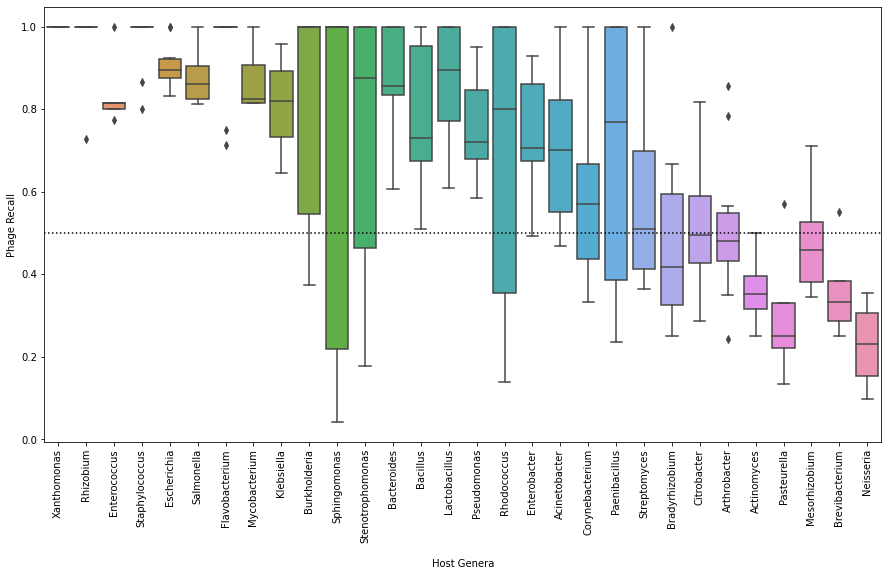

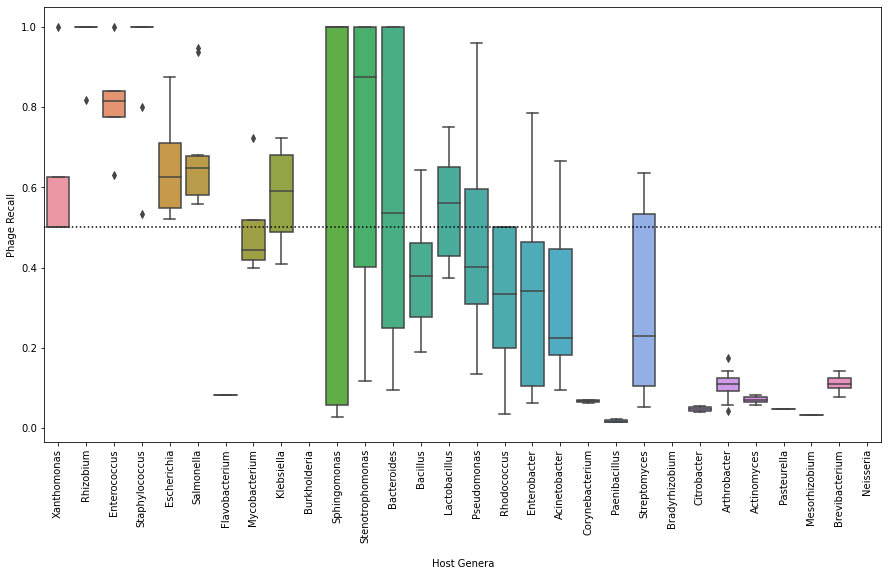

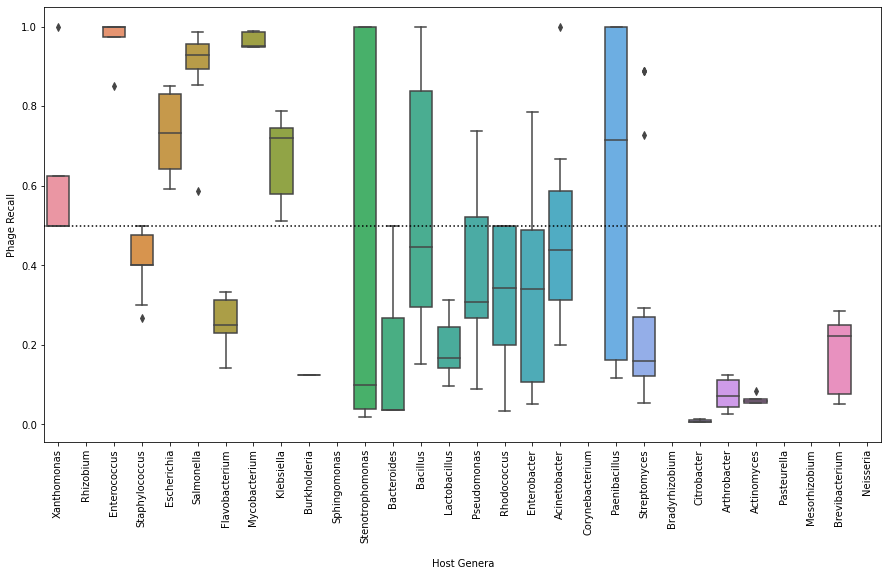

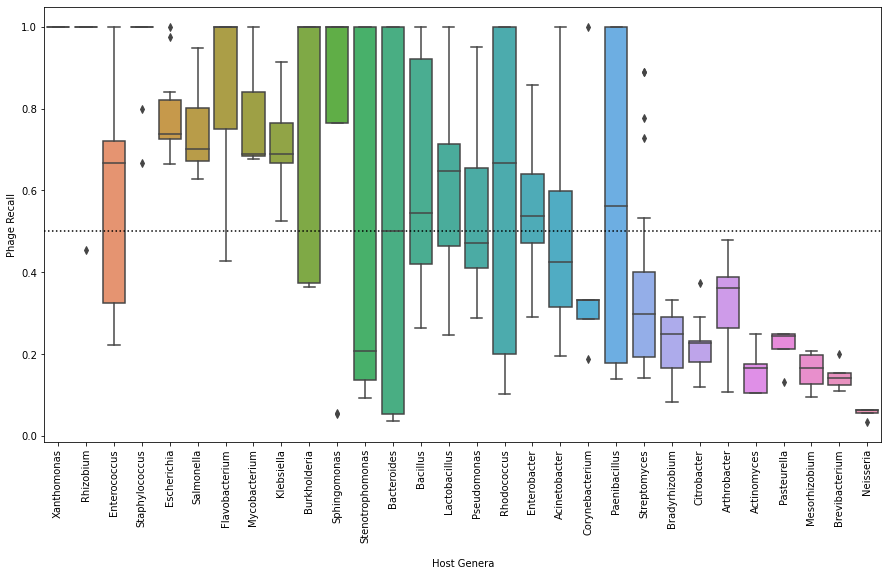

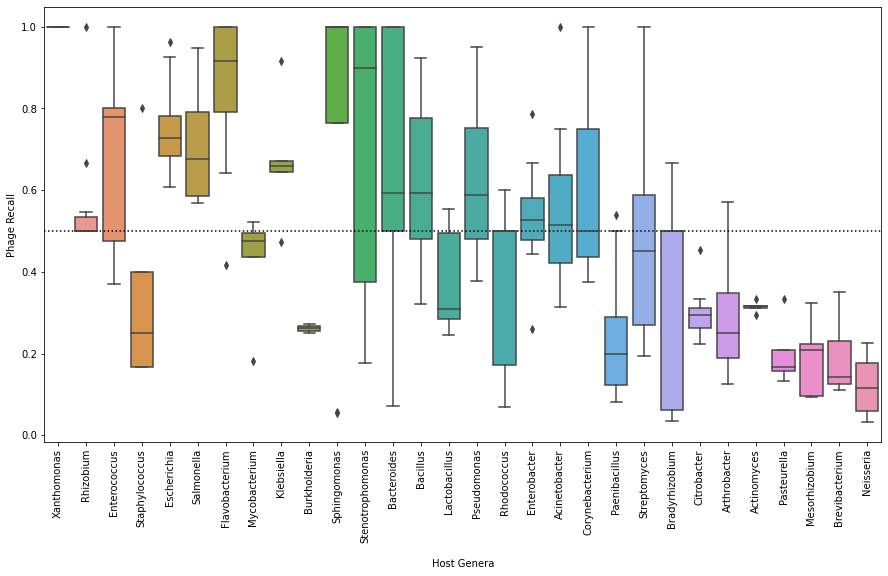

In [259]:
for i in range(0, len(df_list)):
    plt.figure(figsize=(15,8))

    sns.boxplot(x="variable", y="value", data=df_list[i], order=my_list)
    tool = df_list[i].iloc[1]["Tool"]
    plt.xticks(rotation = 90)
    plt.xlabel("\nHost Genera")
    plt.ylabel("Phage Recall")
    plt.axhline(y=0.5, color="black", ls=":")
    command = tool + "_Genera.png"
    plt.savefig(command, dpi=350, bbox_inches='tight')

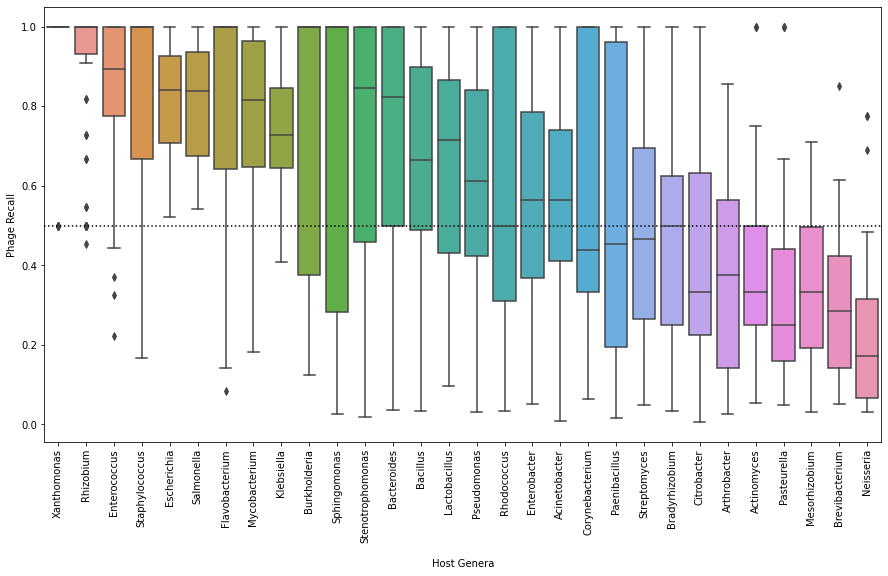

In [123]:
plt.figure(figsize=(15,8))

sns.boxplot(x="variable", y="value", data=df_m, order=my_list)
#plt.legend(bbox_to_anchor=(1.00, 1),borderaxespad=0)
plt.xticks(rotation = 90)
plt.xlabel("\nHost Genera")
plt.ylabel("Phage Recall")
plt.axhline(y=0.5, color="black", ls=":")
plt.savefig("Recall_Genera_Boxes.jpg", dpi=350, bbox_inches='tight')

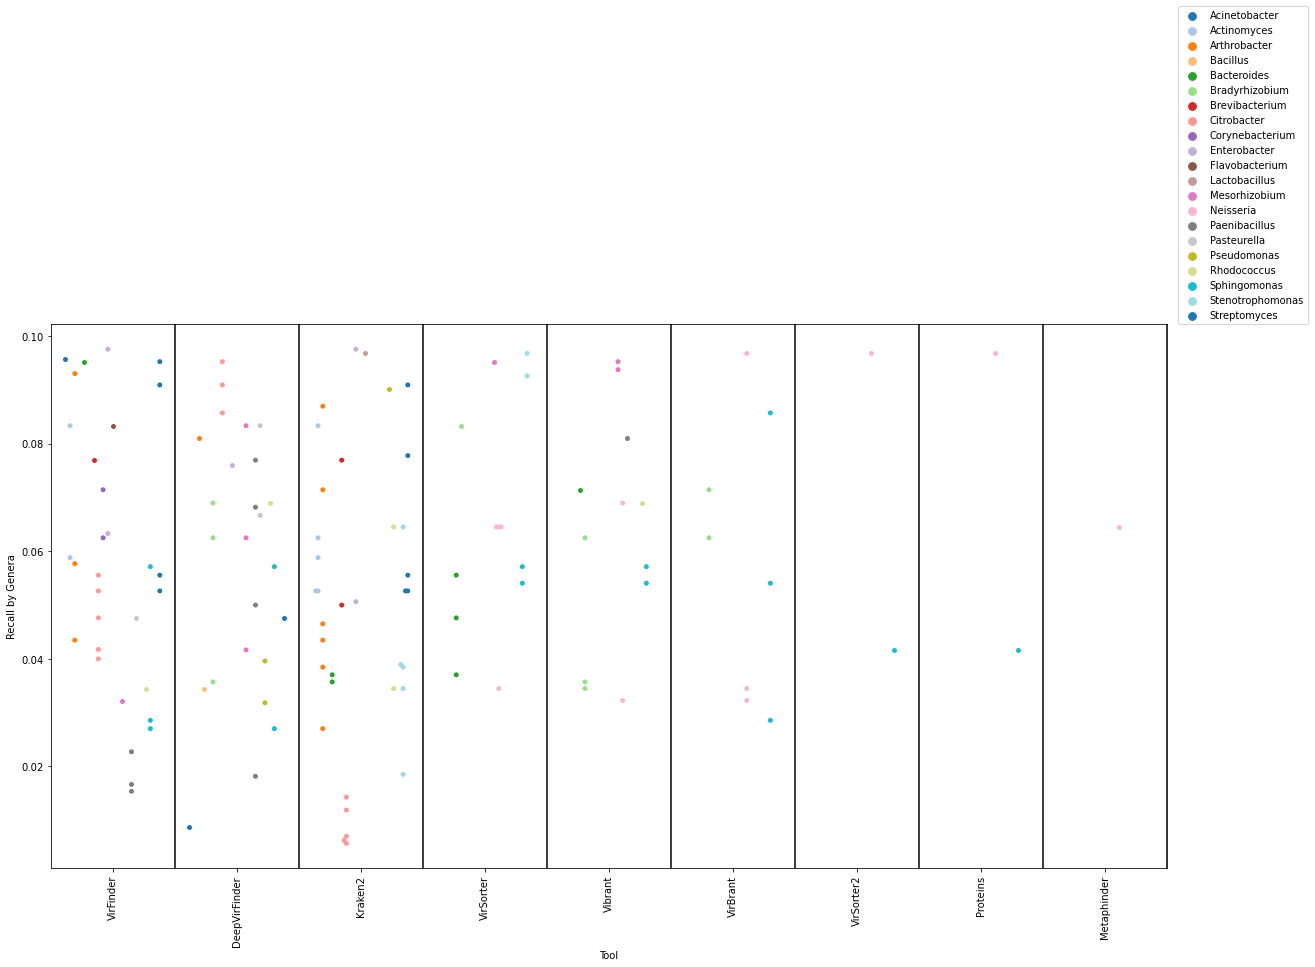

In [248]:
plt.figure(figsize=(20,10))
g = sns.swarmplot(data=df_m, x="Tool", y="value", hue="variable", dodge=True, palette="tab20")
#g = sns.boxplot(data=df_g, x="Tool", y="value", hue="variable", dodge=True, palette="tab20")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Contig Length in Base Pairs (BPs)")

#Tools = ['Vibrant', "VirSorter", "Kraken2", "VirFinder", "DeepVirFinder", "VirSorter2",  "VirBrant", "VirBrant Proteins", "Metaphinder", "Earth Virome"]

#g.set_xticklabels(Tools)
plt.xticks(rotation = 90)
plt.axvline(0.5, c='black')
plt.axvline(1.5, c='black')
plt.axvline(2.5, c='black')
plt.axvline(3.5, c='black')
plt.axvline(4.5, c='black')
plt.axvline(5.5, c='black') 
plt.axvline(6.5, c='black')
plt.axvline(7.5, c='black')
plt.axvline(8.5, c='black')
plt.axvline(9.5, c='black')

plt.xlabel("Tool")
plt.ylabel("Recall by Genera")
plt.savefig("Recall_Genera_10.jpg", dpi=350, bbox_inches='tight')

Text(0, 0.5, 'Recall by Genera')

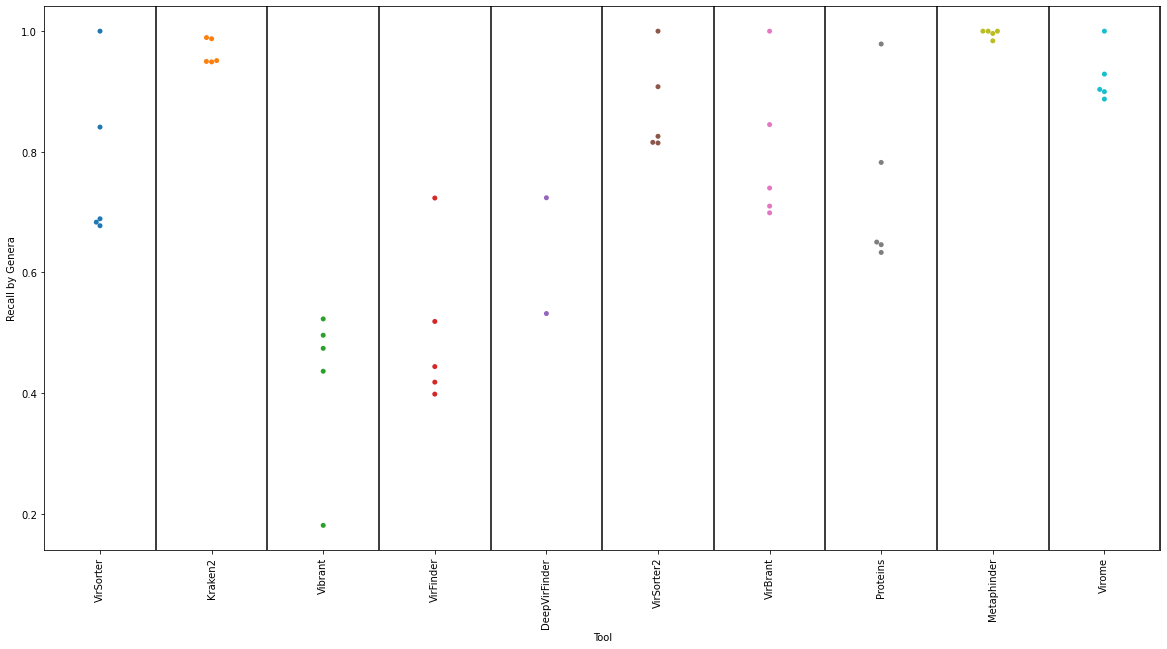

In [124]:
df_g2 = df_m[df_m['variable']=="Mycobacterium"]
plt.figure(figsize=(20,10))
g = sns.swarmplot(data=df_g2, x="Tool", y="value")

#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.xlabel("Contig Length in Base Pairs (BPs)")

#Tools = ['Vibrant', "VirSorter", "Kraken2", "VirFinder", "DeepVirFinder", "VirSorter2", "VirBrant Features", "VirBrant", "VirBrant Proteins", "Metaphinder", "Earth Virome"]

#g.set_xticklabels(Tools)
plt.xticks(rotation = 90)
plt.axvline(0.5, c='black')
plt.axvline(1.5, c='black')
plt.axvline(2.5, c='black')
plt.axvline(3.5, c='black')
plt.axvline(4.5, c='black')
plt.axvline(5.5, c='black')
plt.axvline(6.5, c='black')
plt.axvline(7.5, c='black')
plt.axvline(8.5, c='black')
plt.axvline(9.5, c='black')

plt.xlabel("Tool")
plt.ylabel("Recall by Genera")
#plt.savefig("Recall_Genera_Gut.jpg", dpi=350, bbox_inches='tight')

In [125]:
#### False Positives

In [126]:
df_fp = pd.read_csv("False_Positives.csv", index_col=0)

df_gut = df[df['Taxonomy']=="Gut"]
df_soil = df[df['Taxonomy']=="Soil"]

df_soil.replace(0, np.nan, inplace=True) 
df_soil.dropna(how='all', axis=1, inplace=True)
df_soil.replace(np.nan, 0, inplace=True)



In [171]:
df_fp = pd.read_csv("False_Positives.csv", index_col=0)
df_fp = df_fp.fillna(0)
df_fp = df_fp.div(df_fp.sum(axis=1), axis=0)
df_fp['Tool'] = [x.split("_")[-1] for x in df_fp.index]
df_fp['Complexity'] = [x.split("_")[1] for x in df_fp.index]
df_fp = df_fp[df_fp['Complexity']!="Low"]
df_fp = df_fp.drop(["Complexity"], axis=1)
df_m_fp = pd.melt(df_fp, id_vars="Tool")
df_m_fp = df_m_fp[df_m_fp['value'] != 0]
df_m_fp = df_m_fp[df_m_fp['Tool'] != "x"]
df_m_fp = df_m_fp[df_m_fp['Tool'] != "y"]
df_m_fp = df_m_fp.dropna()

In [172]:
#df_m_fp.groupby("variable").count()

In [173]:
len(df_m_fp)

2942

In [174]:
df_m_fp2 = df_m_fp[df_m_fp['value']>=0.3333]

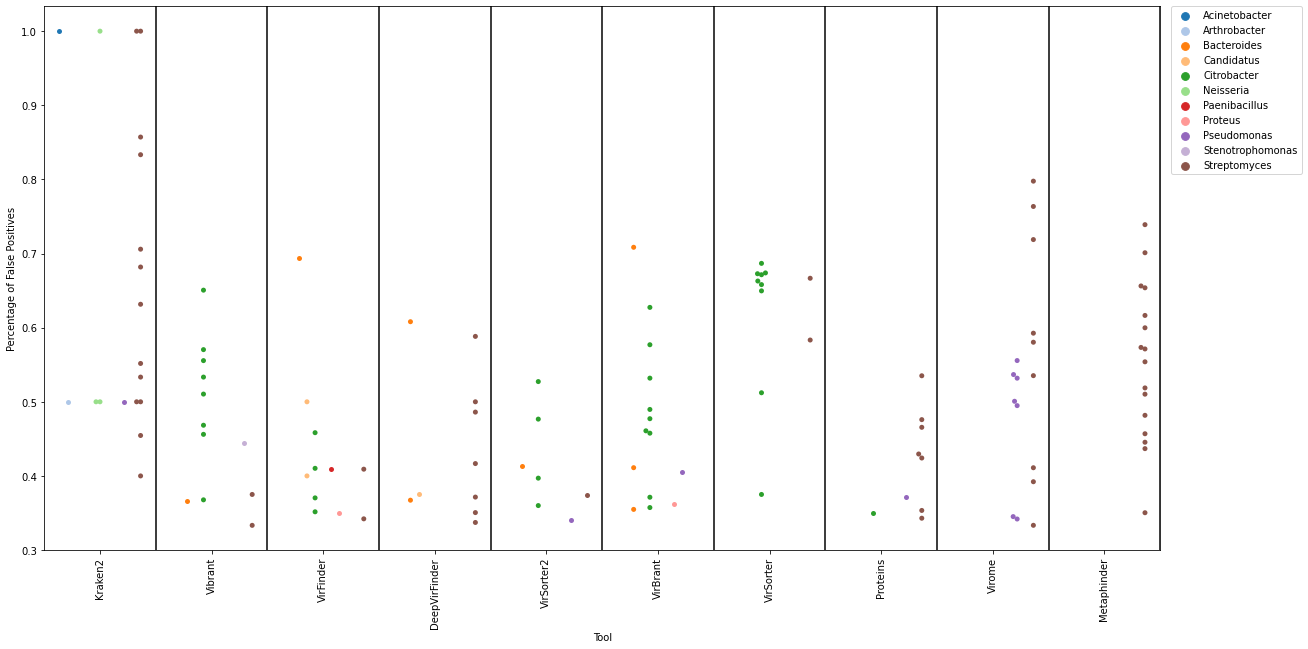

In [238]:
import seaborn as sns
plt.figure(figsize=(20,10))
g = sns.swarmplot(data=df_m_fp2, x="Tool", y="value", hue="variable", dodge=True, palette="tab20")

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.xlabel("Contig Length in Base Pairs (BPs)")

#Tools = ['Vibrant', "VirSorter", "Kraken2", "VirFinder", "DeepVirFinder", "VirSorter2", "VirBrant", "VirBrant Proteins", "Metaphinder", "Earth Virome"]
#Tools = ["Kraken2", "VirFinder", "DeepVirFinder", "VirBrant", "VirSorter","Vibrant","VirSorter2", "Earth Virome","VirBrant Proteins", "Metaphinder"]

#g.set_xticklabels(Tools)
plt.xticks(rotation = 90)
plt.axvline(0.5, c='black')
plt.axvline(1.5, c='black')
plt.axvline(2.5, c='black')
plt.axvline(3.5, c='black')
plt.axvline(4.5, c='black')
plt.axvline(5.5, c='black')
plt.axvline(6.5, c='black')
plt.axvline(7.5, c='black')
plt.axvline(8.5, c='black')
plt.axvline(9.5, c='black')

plt.xlabel("Tool")
plt.ylabel("Percentage of False Positives")
plt.savefig("FP_Genera.jpg", dpi=350, bbox_inches='tight')

In [236]:
df_m_fp2.groupby(["Tool", "variable"]).count()

value
Tool          variable               
DeepVirFinder Bacteroides           2
              Candidatus            1
              Streptomyces          7
Kraken2       Acinetobacter         1
              Arthrobacter          1
              Neisseria             3
              Pseudomonas           1
              Streptomyces         13
Metaphinder   Streptomyces         16
Proteins      Citrobacter           1
              Pseudomonas           1
              Streptomyces          7
Vibrant       Bacteroides           1
              Citrobacter           8
              Stenotrophomonas      1
              Streptomyces          2
VirBrant      Bacteroides           3
              Citrobacter           9
              Proteus               1
              Pseudomonas           1
VirFinder     Bacteroides           1
              Candidatus            2
              Citrobacter           4
              Paenibacillus         1
              Proteus               1
              Streptomyces          2
VirSorter     Citrobacter           9
              Streptomyces          2
VirSorter2    Bacteroides           1
              Citrobacter           4
              Pseudomonas           1
              Streptomyces          1
Virome        Pseudomonas           7
              Streptomyces          9

In [177]:
df_m_fp2.groupby(["variable"]).count()

,Tool,value
variable,,
Acinetobacter,1,1
Arthrobacter,1,1
Bacteroides,8,8
Candidatus,3,3
Citrobacter,35,35
Neisseria,3,3
Paenibacillus,1,1
Proteus,2,2
Pseudomonas,11,11
